

## --- PROBLEM 1 ---




Make sure to upload WA_Fn-UseC_-Telco-Customer-Churn.csv

In [2]:
# Upload Necessary Files

from google.colab import files
# Choose proper files to upload
# This is WA_Fn-UseC_-Telco-Customer-Churn.csv
files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


{'WA_Fn-UseC_-Telco-Customer-Churn.csv': b'customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\r\n7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No\r\n5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No\r\n3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes\r\n7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No\r\n9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes\r\n9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.

In [26]:
# customerChurnPrediction.py

# Importing Libraries

import pandas as panda # Data loading, manipulation, cleaning, and visualization

from sklearn.model_selection import train_test_split # Split data into training and testing sets
from sklearn.model_selection import cross_validate # Uses multiple metrics and returns dictionary of scores

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.naive_bayes import GaussianNB # Naive Bayes Model

from sklearn.metrics import accuracy_score # Measures accuracy
from sklearn.metrics import precision_score # Measures precision
from sklearn.metrics import recall_score # Measures recall
from sklearn.metrics import f1_score # Measures F1 Score
from sklearn.metrics import roc_auc_score # Measures ROC-AUC Score

from sklearn.preprocessing import StandardScaler # Standard Scaler
from sklearn.preprocessing import LabelEncoder # Encodes labels as ints

from sklearn.impute import SimpleImputer # Handles missing data

# ---------- Load data from CSV ----------

try:
    data = panda.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

# ---------- Preprocess the data ----------

# Handle missing values using most common value for LR
imputerMostFrequent = SimpleImputer(strategy='most_frequent')
dataImputedMostFrequent = panda.DataFrame(imputerMostFrequent.fit_transform(data),
                                          columns=data.columns)

# Handle missing values using default value (0) for NB
imputerDefault = SimpleImputer(strategy='constant', fill_value=0)
dataImputedDefault = panda.DataFrame(imputerDefault.fit_transform(data),
                                     columns=data.columns)

# Encode categorical data
labelEncoders = {}
for column in dataImputedMostFrequent.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        labEnc = LabelEncoder()
        dataImputedMostFrequent[column] = labEnc.fit_transform(dataImputedMostFrequent[column])
        dataImputedDefault[column] = labEnc.fit_transform(dataImputedDefault[column])
        labelEncoders[column] = labEnc

# Scale Numerical Features
scaler = StandardScaler()
numericalFeatures = ['tenure', 'MonthlyCharges', 'TotalCharges'] # Numerical Features of data
   # Fit and transform most frequent dataset
dataImputedMostFrequent[numericalFeatures] = scaler.fit_transform(
    dataImputedMostFrequent[numericalFeatures])
   # Fit and transform default dataset
dataImputedDefault[numericalFeatures] = scaler.fit_transform(
    dataImputedDefault[numericalFeatures])

# ---------- Split Data Into Features and Target ----------

# (X = features, y = target)
# Exclude customer ID and target variable from features
# Include only target variable in target
X_MostFrequent = dataImputedMostFrequent.drop(columns=['customerID', 'Churn'])
y_MostFrequent = dataImputedMostFrequent['Churn']

X_Default = dataImputedDefault.drop(columns=['customerID', 'Churn'])
y_Default = dataImputedDefault['Churn']

# ---------- Split Data Into Training and Testing Sets ----------

# X_TrainMF = Training Features for Most Frequent Dataset
# X_TestMF = Testing Features for Most Frequent Dataset
# y_TrainMF = Training Target for Most Frequent Dataset
# y_TestMF = Testing Target for Most Frequent Dataset
# test_size = 20% for testing, 80% for training
# random_state = 88 for reproducibility
X_TrainMF, X_TestMF, y_TrainMF, y_TestMF = train_test_split(
    X_MostFrequent, y_MostFrequent, test_size=0.2, random_state=88)

# X_TrainDF = Training Features for Default Dataset
# X_TestDF = Testing Features for Default Dataset
# y_TrainDF = Training Target for Default Dataset
# y_TestDF = Testing Target for Default Dataset
# test_size = 20% for testing, 80% for training
# random_state = 88 for reproducibility
X_TrainDF, X_TestDF, y_TrainDF, y_TestDF = train_test_split(
    X_Default, y_Default, test_size=0.2, random_state=88)

# ---------- Initialize Models ----------

# Logistic Regression Model
logReg = LogisticRegression(max_iter=1000)

# Naive Bayes Model
naiveBayes = GaussianNB()

# ---------- Perform 5-Fold Cross-Validation and Evaluate Models ----------

def evaluateModel(model, X_Train, y_Train):
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    scores = cross_validate(model, X_Train, y_Train, cv=5, scoring=scoring)

    # Returns dictionary of average scores for each metric
    return {metric: scores[f'test_{metric}'].mean() for metric in scoring}

# Evaluate Logistic Regression Model
logRegResults = evaluateModel(logReg, X_TrainMF, y_TrainMF)

# Evaluate Naive Bayes Model
naiveBayesResults = evaluateModel(naiveBayes, X_TrainDF, y_TrainDF)

# ---------- Print Results ----------
print("\nLogistic Regression Results (Most Frequent):")
for metric, score in logRegResults.items():
    print(f"{metric}: {score:.4f}")

print("\nNaive Bayes Results (Default):")
for metric, score in naiveBayesResults.items():
    print(f"{metric}: {score:.4f}")




Logistic Regression Results (Most Frequent):
accuracy: 0.8035
precision: 0.6614
recall: 0.5342
f1: 0.5903
roc_auc: 0.8420

Naive Bayes Results (Default):
accuracy: 0.7538
precision: 0.5260
recall: 0.7289
f1: 0.6109
roc_auc: 0.8251


## CoPilot and Libraries Used

### GitHub CoPilot
- I used GitHub CoPilot to assist with my learning of the libraries listed below. It helped me understand what each function in the library did in regard to the code.

### 'pandas' library
I was recommended the pandas library by CoPilot because of its ability to load data from a csv (super useful in problem 1), data manipulation, etc. More specifically, I used it for:
- Loading the dataset using 'panda.read_csv'
- Handling missing values (Most Frequent and Default)

### 'scikit-learn' library
As mentioned in the overview for this assignment, I wanted to learn more about scikit-learn and used CoPilot to assist with that. I learned that it was generally useful for basic machine learning model implementations and the steps of training a machine based on its dataset. I used scikit-learn specifically for:
- Encoding categorical data using 'LabelEncoder'
- Scaling numerical features using 'StandardScaler'
- Splitting the dataset into training and testing sets using 'train_test_split'
- Implementing and training the linear regression and naive bayes models.
- Performing 5-fold cross validation using 'cross_validate'
- Evaluating the models using all the metrics imported (accuracy, precision, recall, f1, and roc_auc)

## Discuss your outcomes from using your chosen preprocessing steps to handle missing data

### Dealing with Missing Values
- **Most Common Value Imputation**: I used this strategy for my Logistic Regression model. When there was a missing value, I used panda's (as recommended by CoPilot) method of transforming the missing data into data that was the most common. Logistic Regression performed successfully with this strategy.

- **Default Value Imputation**: I used this strategy for my Naive Bayes model. When there was a missing value, I used panda's method of transforming the missing data into a default data value of 0. Naive Bayes performed successfully with this strategy.

## Compare the performance of both models and discuss their strengths and weaknesses. Which model is more suited for this dataset and why?

### Logistic Regression (Most Frequent)
- Accuracy: 0.8035
- Precision: 0.6614
- Recall: 0.5342
- F1 Score: 0.5903
- ROC-AUC: 0.8421

### Naive Bayes (Default)
- Accuracy: 0.7538
- Precision: 0.5260
- Recall: 0.7289
- F1 Score: 0.6109
- ROC-AUC: 0.8251

### Strengths and Weaknesses
- **Logistic Regression**:
  - Strengths: The strengths of logistic regression seem to lie more with their accuracy, precision, and roc-auc scores. You also have more interpretable coefficients, which can help with the importance of different features from a dataset.
  - Weaknesses: The weaknesses of logistic regression seem to lie more with their recall and f1 scores.
- **Naive Bayes**:
  - Strengths: The strengths of naive bayes seem to lie more with their recall and f1 scores. Naive Bayes also makes it quite simple and fast for training.
  - Weaknesses: The weaknesses of naive bayes seem to lie more with their accuracy, precision, and roc-auc scores.

### Suitability
- Because of the strengths, Logistic Regression is more suitable for this dataset.

## Insights gained from your experiments

1. **Precision and Recall Trade-Offs**:
   - Logistic Regression prioritized precision over recall, meaning it was better for datasets where false positives are more impactful.
   - Naive Bayes prioritized recall over precision, meaning it was better for datasets where false negatives are more impactful.

2. **Model Selection Based on Objectives**:
   - Logistic Regression is better for problems requiring higher overall accuracy and precision
   - Naive Bayes is better for problems requiring higher recall and a better F1, or balance between precision and recall, especially when quick predictions are needed.

3. **Impact of Preprocessing**:
   - Most frequent value imputation kept the distribution of categorical data roughly similar to how it was (due to the most common value being in the place of the missing data), while default value imputation provided a simple and fast solution for handling missing values.




## --- PROBLEM 2 ---

Make sure to upload the proper `test_image.png`

In [27]:
# Upload Necessary Files

from google.colab import files
# Choose proper files to upload
# This is test_image.png
files.upload()

Saving test_image.png to test_image (1).png


{'test_image (1).png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x80\x00\x00\x00\x80\x08\x02\x00\x00\x00L\\\xf6\x9c\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\tpHYs\x00\x00\x0b\x13\x00\x00\x0b\x13\x01\x00\x9a\x9c\x18\x00\x00\x00\x07tIME\x07\xdb\x0b\x0f\x028:I\x89\xd6,\x00\x00 \x00IDATx\xda4\xbbW\xaf\xaf\xd9\x91\xdeWU+\xbd\xe1\x9fv\x0e\'\x9f\xce\xcd4M\x0e\xc9\t\x9c\xb1da Y\xf2\x85/\x9c \xdb\xb0!\x03\xb6.\x0c\x0b\x86\x01_\xfa\x83\x18\x86|\xe1\x0b\x03\x06\x1cd\r\xc6c\xd8\xd2\x8c,\x91\xec\x19\x0e\xc9!\x9b\xec\xee\xd3\xf9\xe4\xb3\xcf\xd9\xe1\x9f\xde\xb0BU\xf9b\xd3\xeb\xfd\x06/j\xd5S\xf5<\xbf\x85\x9f\xfe\xf1\x7f\xde\xbai\xc1\xc4\x9a)\x89\xa9& \x05\xc8p\x89\xb1\xebL\xe5]\x08%\xf7D\x10,r\x92\x94\xd8\xb7\xad\xb1\xacCI\x80\xc9\xa2QoT\xa1\x14%\xa3\x9a \x8d\x88\xde\x86=v\xde9+\x1cIK\xe3$\x8b\x89\xb9\xb3N5\xdb\xbetn\x1c\xbcq\x05\xacC\x89cV\x85\x02Bc\xd9\xf0H\x01\xa4T\x85\xd5`\xce"E\x1dQ\xf1%k.j\xc06\xceQ\xbd\x1e\xb7\x8a\x886\xb0m\xd3\x90s\xbe\x146\xd9L\xbd\x17\xa7\xaavG\x8cU\xe8|\x


Enter the number of clusters (k): 30


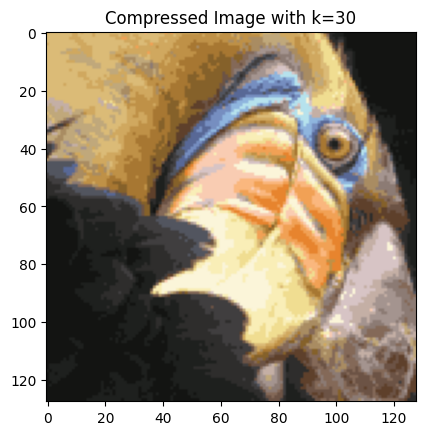

True

In [28]:
# imageCompression.py

# Importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

# ---------- Load image ----------
img = cv2.imread('test_image.png')
# Coverts BGR image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, channels = np.shape(img)

# Reshape image to a 2D array of pixels
pixels = img.reshape(-1, 3)

# ---------- Perform K-Means ----------

# Get number of clusters as input from user
k = int(input("\nEnter the number of clusters (k): "))

# K-Means
kmeans = KMeans(n_clusters=k, random_state=88)
kmeans.fit(pixels)
clusters = kmeans.predict(pixels)
centroids = kmeans.cluster_centers_

# ---------- Reconstruct the image ----------

# Reconstruct the image using the centroids and clusters
def reconstructImage(centroids, clusters, height, width):
    compressedPixels = centroids[clusters].astype(np.uint8)
    return compressedPixels.reshape(height, width, 3)

compressedImg = reconstructImage(centroids, clusters, height, width)

# Iterate each pixel in the image and assign closest color to each pixel
for i in range(width):
    for j in range(height):
        pixel = img[j, i] # Read the pixel at location (i, j)
        clusterIndex = clusters[j * width + i]
        newValue = centroids[clusterIndex]
        img[j][i] = newValue # Assign the new value to the pixel

# ---------- Display the images ----------
plot.imshow(img)
plot.title("Compressed Image with k={}".format(k))
plot.show()

# Save the compressed image
compressedImgBGR = cv2.cvtColor(compressedImg, cv2.COLOR_RGB2BGR) # Convert RGB to BGR
cv2.imwrite('compressed_test_image.png', compressedImgBGR)


## Briefly describe your thoughts about which k value works best for this problem.

I have drawn conclusions that the image is recompressed almost perfectly at around `k=30`. This is when almost all colors have been reconstructed in comparison to the original image.

A value of around `k=30` works best for this image compression problem. At `k=30`:
- The compressed image has almost all the colors and details of the original image.
- Increasing `k` beyond `30` does not dramatically improve the visuals, suggesting that `k=30` is an optimal balance.
- On the other hand, decreasing `k` below `30` will show that in comparison to `k=30` there are less colors visible. This supports that around `30` is the best value.

- K = 1: 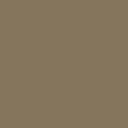

- K = 5: 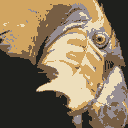

- K = 10: 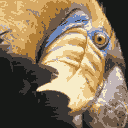

- K = 20: 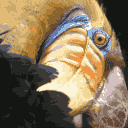

- K = 30: 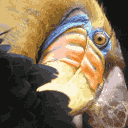

- K = 40: 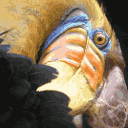